In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API Key
#from api_keys import api_key

# Incorporated Citipy to Determine City Based on Latitude & Longitude
from citipy import citipy

# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

634

In [4]:
# Get Weather Data
weather_api_key = "a9b0090e576a07d40a4cd9d5a6d34194"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -70.92,
        "lat": -53.15
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 48.09,
        "feels_like": 42.48,
        "temp_min": 48,
        "temp_max": 48.2,
        "pressure": 1013,
        "humidity": 81
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.93,
        "deg": 160
    },
    "clouds": {
        "all": 75
    },
    "dt": 1604388054,
    "sys": {
        "type": 1,
        "id": 8487,
        "country": "CL",
        "sunrise": 1604393736,
        "sunset": 1604447929
    },
    "timezone": -10800,
    "id": 3874787,
    "name": "Punta Arenas",
    "cod": 200
}


In [5]:
print(requests.get(query_url + city))

<Response [200]>


In [6]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("not found") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Castro
not found
Processing Record 2 | Saint Paul Harbor
Processing Record 3 | Kavieng
Processing Record 4 | Geraldton
Processing Record 5 | Tasiilaq
Processing Record 6 | Punta Arenas
Processing Record 7 | São Filipe
Processing Record 8 | Butaritari
Processing Record 9 | Zhoukou
Processing Record 10 | Khatanga
Processing Record 11 | Kungurtug
not found
Processing Record 12 | Bull Savanna
Processing Record 13 | East London
Processing Record 14 | Mar del Plata
Processing Record 15 | Pyskowice
Processing Record 16 | Marawi
Processing Record 17 | Faya
Processing Record 18 | Iqaluit
Processing Record 19 | Hermanus
Processing Record 20 | Lebu
not found
Processing Record 21 | Nikolskoye
Processing Record 22 | Kalāleh
Processing Record 23 | Busselton
Processing Record 24 | Suphan Buri
Processing Record 25 | Torbay
Processing Record 26 | Saskylakh
Processing Record 27 | Fortuna
Processing Record 28 | Ribeira Grande


not found
Processing Record 240 | Kamenka
Processing Record 241 | Province of Mantua
not found
Processing Record 242 | Karratha
Processing Record 243 | Fukuechō
Processing Record 244 | Mahébourg
Processing Record 245 | Nara
Processing Record 246 | Nacala
Processing Record 247 | Yambio
Processing Record 248 | Pozhva
Processing Record 249 | Richards Bay
Processing Record 250 | Altamira
Processing Record 251 | Boa Vista
Processing Record 252 | Hofn
Processing Record 253 | Guerrero Negro
Processing Record 254 | Mezen'
Processing Record 255 | Motoşeni
Processing Record 256 | Faanui
not found
Processing Record 257 | Puerto Madryn
Processing Record 258 | Ancud
Processing Record 259 | Vargem Grande do Sul
Processing Record 260 | Los Llanos de Aridane
Processing Record 261 | Dicabisagan
Processing Record 262 | Ikom
Processing Record 263 | Upington
Processing Record 264 | Polunochnoye
Processing Record 265 | Saint George
Processing Record 266 | Tarsus
Processing Record 267 | São Félix do Xingu
P

Processing Record 480 | Aktau
Processing Record 481 | Emerald
Processing Record 482 | Touros
Processing Record 483 | Vredendal
Processing Record 484 | Lüderitz
Processing Record 485 | Hlotse
not found
Processing Record 486 | Yaan
Processing Record 487 | General Roca
Processing Record 488 | Livramento
Processing Record 489 | Vila Franca do Campo
Processing Record 490 | Lebanon
Processing Record 491 | Carlsbad
Processing Record 492 | Trogir
Processing Record 493 | Ponta Delgada
Processing Record 494 | Belle Fourche
Processing Record 495 | Dalby
Processing Record 496 | Beyneu
Processing Record 497 | Kano
Processing Record 498 | Portland
Processing Record 499 | Paita
Processing Record 500 | Kamina
Processing Record 501 | Kahului
Processing Record 502 | Tessalit
Processing Record 503 | Dunedin
not found
Processing Record 504 | Belomorsk
Processing Record 505 | Forotic
Processing Record 506 | Black River
Processing Record 507 | Rio Grande
Processing Record 508 | Oliveira dos Brejinhos
Proces

In [7]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               581
Country            581
Date               581
Latitude           581
Longitude          581
Max Temperature    581
Humidity           581
Cloudiness         581
Wind Speed         581
dtype: int64

In [8]:
#dataframe
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Castro,BR,1604388255,-24.79,-50.01,52.25,84,100,7.94
1,Saint Paul Harbor,US,1604388163,57.79,-152.41,24.80,49,1,11.41
2,Kavieng,PG,1604388186,-2.57,150.80,84.33,72,76,1.97
3,Geraldton,AU,1604388256,-28.77,114.60,73.40,56,95,17.22
4,Tasiilaq,GL,1604388256,65.61,-37.64,26.60,53,0,2.24


In [9]:
#output data as csv
weather_data.to_csv("./data/weather_data.csv")

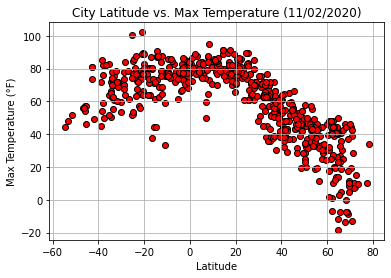

In [10]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (11/02/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()